In [97]:
#importando bibliotecas que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import folium
filterwarnings('ignore')

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='ISO-8859-1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [58]:
df['category'].nunique()

18

In [59]:
df.shape

(995, 28)

In [60]:
df.duplicated().sum()

0

Em nosso dataset, temos os 995 canais do Youtube de maior influência no mundo.

In [61]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


Análises interessantes a serem feitas:
    
- A média de uploads feitas por cada canal é de 9187 vídeos aproximadamente;
- Existem canais que são muito mais vistos fora do país do que nele mesmo, como por exemplo o 'Official Pink Panther', classificado como o 7741º canal com mais inscritos em seu país de origem mesmo estando entre os top 1000 do mundo;
- O canal mais antigo criado foi em 1970 e o mais novo foi em 2022;
- O desvio padrão do valor recebido em dólares tanto mensais quanto anuais é altíssimo.

In [62]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

Como vemos acima, temos bastante células em branco no nosso dataset, talvez possa dificultar ter informações muito exatas, mas nada que impdirá nossa análise.

In [63]:
df[df['video views']==0]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
1,2,YouTube Movies,170000000,0.0,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,12.0,0.0,0.05,0.04,0.58,NaN,2006.0,Mar,5.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
5,6,Music,119000000,0.0,NaN,Music,0,NaN,NaN,Music,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.0,NaN,Gaming,0,NaN,NaN,Games,4057944.0,NaN,1.0,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Dec,15.0,NaN,NaN,NaN,NaN,NaN,NaN
18,19,Sports,75000000,0.0,NaN,sports,3,United States,US,Entertainment,3898122.0,6266.0,5395.0,16.0,0.0,0.06,0.05,0.77,NaN,2006.0,Jan,30.0,88.2,328239523.0,14.7,270663028.0,37.09024,-95.712891
102,103,News,36300000,0.0,NaN,News,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2013.0,Sep,9.0,NaN,NaN,NaN,NaN,NaN,NaN
173,174,Popular on YouTube,29300000,0.0,NaN,Popular on Youtube,3,NaN,NaN,Education,4019724.0,NaN,4847.0,1.0,0.0,0.00,0.00,0.05,NaN,2017.0,Aug,7.0,NaN,NaN,NaN,NaN,NaN,NaN
360,361,Minecraft - Topic,20900000,0.0,NaN,Minecraft - Topic,0,NaN,NaN,Games,4057944.0,NaN,24.0,NaN,0.0,0.00,0.00,0.00,300000.0,2013.0,Dec,20.0,NaN,NaN,NaN,NaN,NaN,NaN
592,593,Live,16100000,0.0,NaN,Live,0,NaN,NaN,NaN,4057944.0,NaN,NaN,NaN,0.0,0.00,0.00,0.00,NaN,2015.0,Jan,13.0,NaN,NaN,NaN,NaN,NaN,NaN


Por exemplo, se vermos os canais que tem 0 views, chegamos na conclusão que estes são apenas tópicos do youtube, com várias sugestões de vídeos.

Text(0.5, 1.0, 'Correlation Matrix')

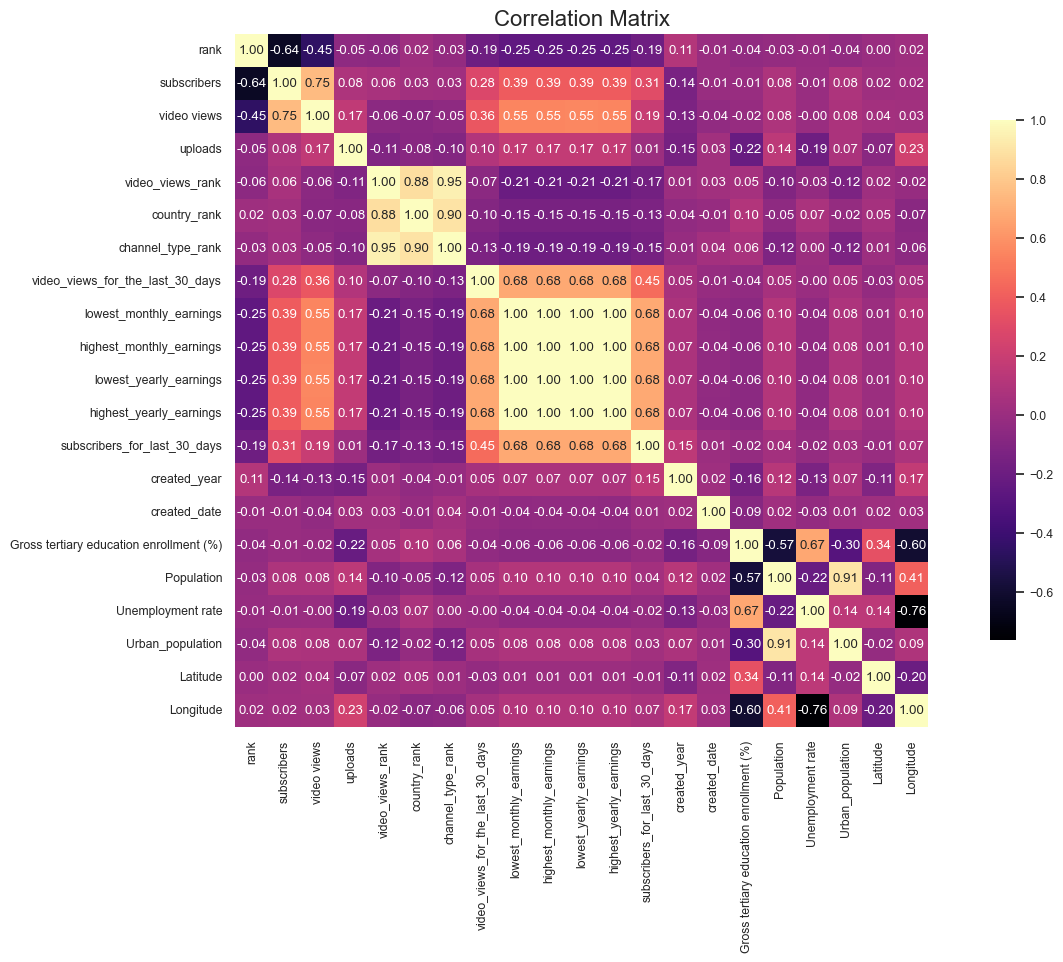

In [93]:
plt.figure(figsize=(16, 9))
sns.set(font_scale=0.8)

sns.heatmap(df.corr(), annot=True, cmap='magma', square=True, cbar_kws={"shrink": 0.75}, fmt=".2f")

plt.title("Correlation Matrix", fontsize=16)

Informações relevantes:
    
- O número de inscritos do canal tem correlação de 75% com o número total de views;
- O número de views em cada vídeo tem correlação de 75% com o número de inscritos do canal;
- O total de ganhos do canal em dinheiro tem correlação de 55% com o número de views do canal 
e 39% com o número de inscritos do canal;
- A taxa de desemprego no país tem 67% de correlação com a porcentagem de pessoas que estão na faculdade nesse país.

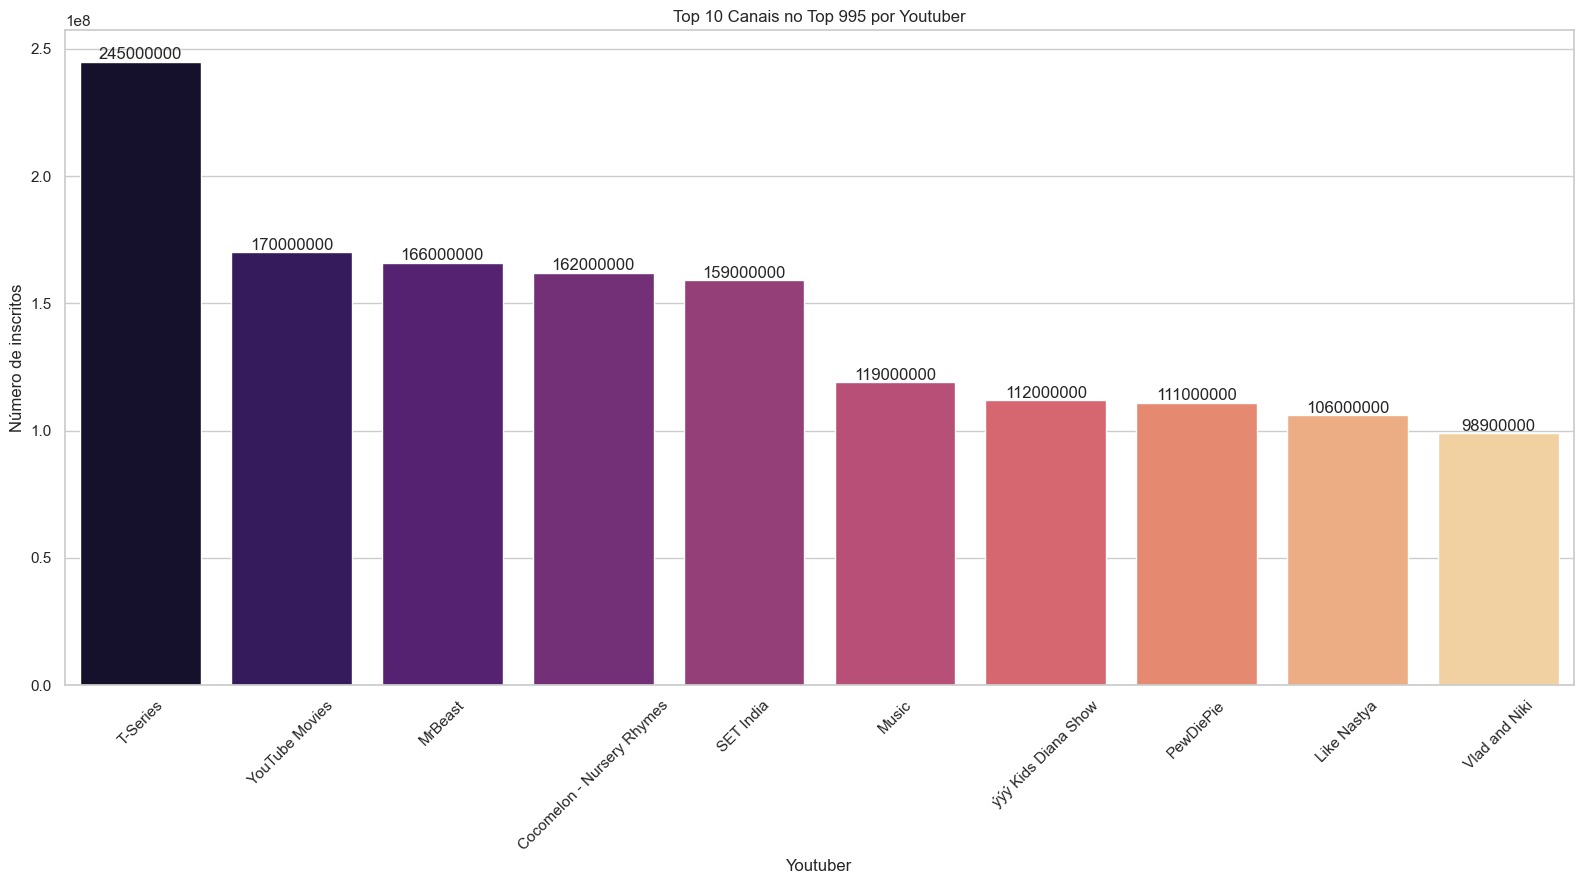

In [76]:
df_sorted = df.sort_values(by='subscribers', ascending=False)

df_top10 = df_sorted.head(10)

plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

ax = sns.barplot(x='Youtuber', y='subscribers', data=df_top10, palette='magma')
plt.xticks(rotation=45)
plt.ylabel('Número de inscritos')
plt.xlabel('Youtuber')
plt.title('Top 10 Canais no Top 995 por Youtuber')
plt.tight_layout()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

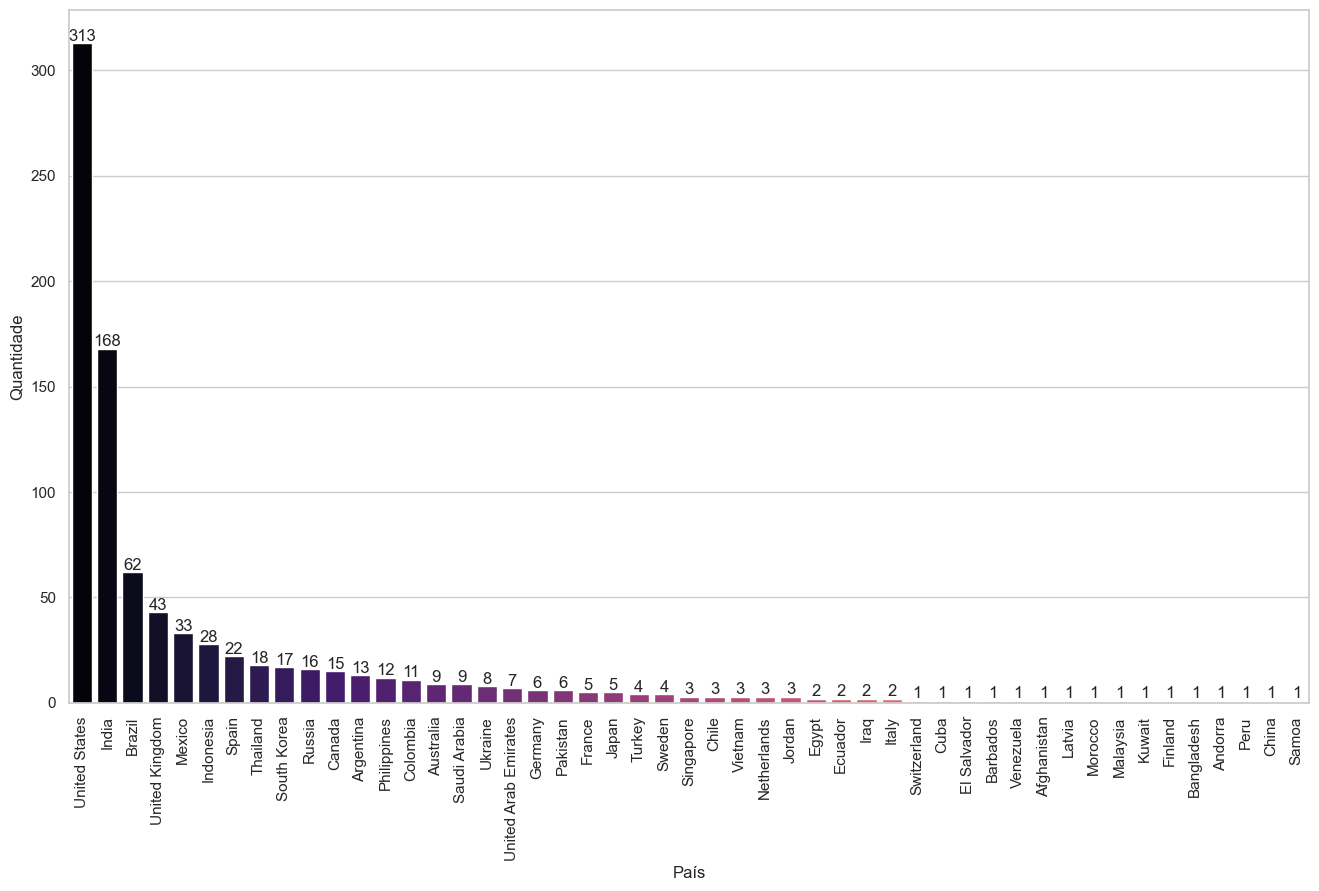

In [92]:
#Total de canais no top 995 por país de origem
df_sorted = df['Country'].value_counts().reset_index()
df_sorted.columns = ['Country', 'Count']
df_sorted = df_sorted.sort_values(by='Count', ascending=False)

plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

ax = sns.barplot(x='Country', y='Count', data=df_sorted, palette='magma')
plt.xticks(rotation=90)
plt.ylabel('Quantidade')
plt.xlabel('País')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

In [98]:
#Todos os países que tem pelo menos 1 canal no top 995 do mundo
all_data_map = folium.Map(prefer_canvas=True)
df_withouna = df.dropna(subset=['Latitude', 'Longitude'])
df_list = [[lat, lon] for lat, lon in zip(df_withouna['Latitude'], df_withouna['Longitude'])]

for i, coordinates in enumerate(df_list):
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius=5,
            weight=2,
            fill=True,
            color='red',
            fill_color='red'
        )
    )
    
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

Em uma representação mais detalhada, estão com pontos vermelhos no mapa todos os países que tem pelo menos 1 pessoa no top 995 canais com mais inscritos no mundo.

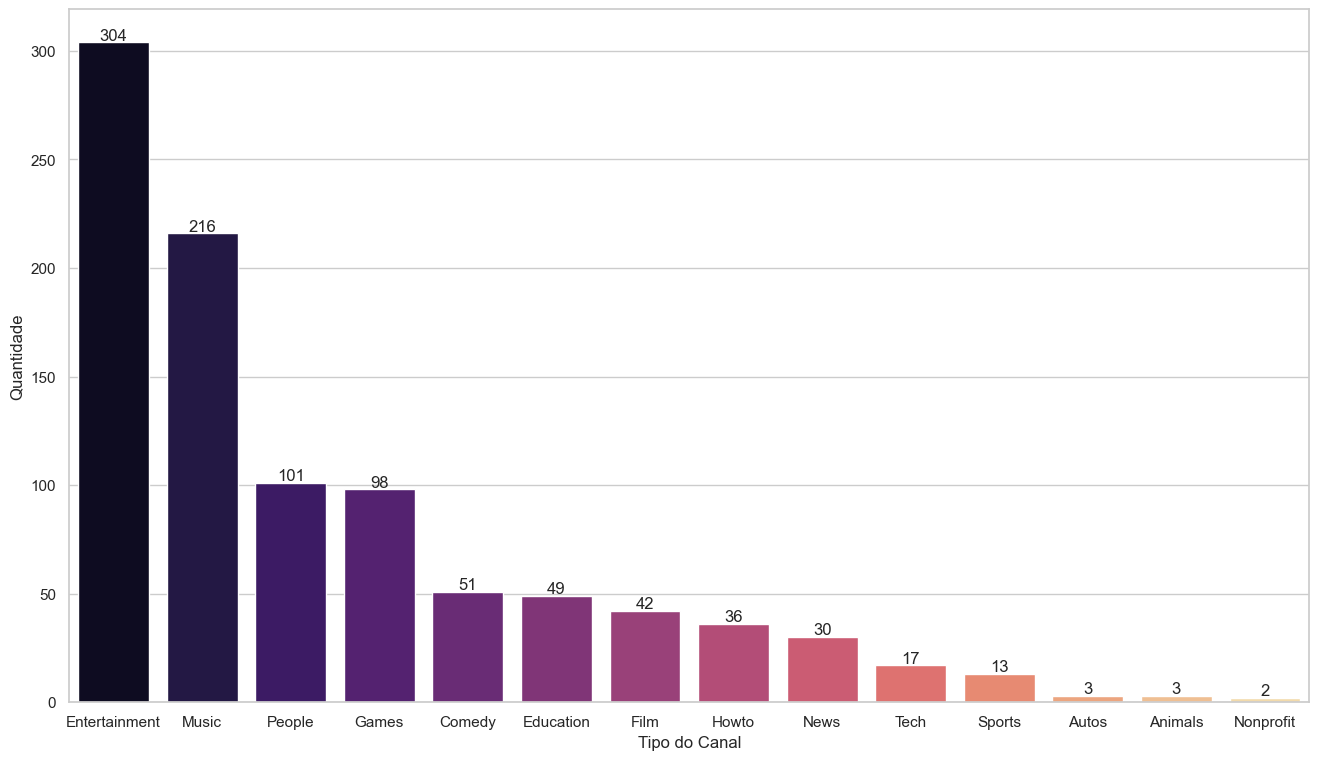

In [91]:
#Total de canais no top 995 por tipo de canal
df_sorted = df['channel_type'].value_counts().reset_index()
df_sorted.columns = ['channel_type', 'Count']
df_sorted = df_sorted.sort_values(by='Count', ascending=False)

plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

ax = sns.barplot(x='channel_type', y='Count', data=df_sorted, palette='magma')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.xlabel('Tipo do Canal')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

Podemos ver que os nichos de maior sucesso são: Entretenimento, Música, Pessoas (Aqui entram várias coisas, mas principalmente vlogs) e Jogos.

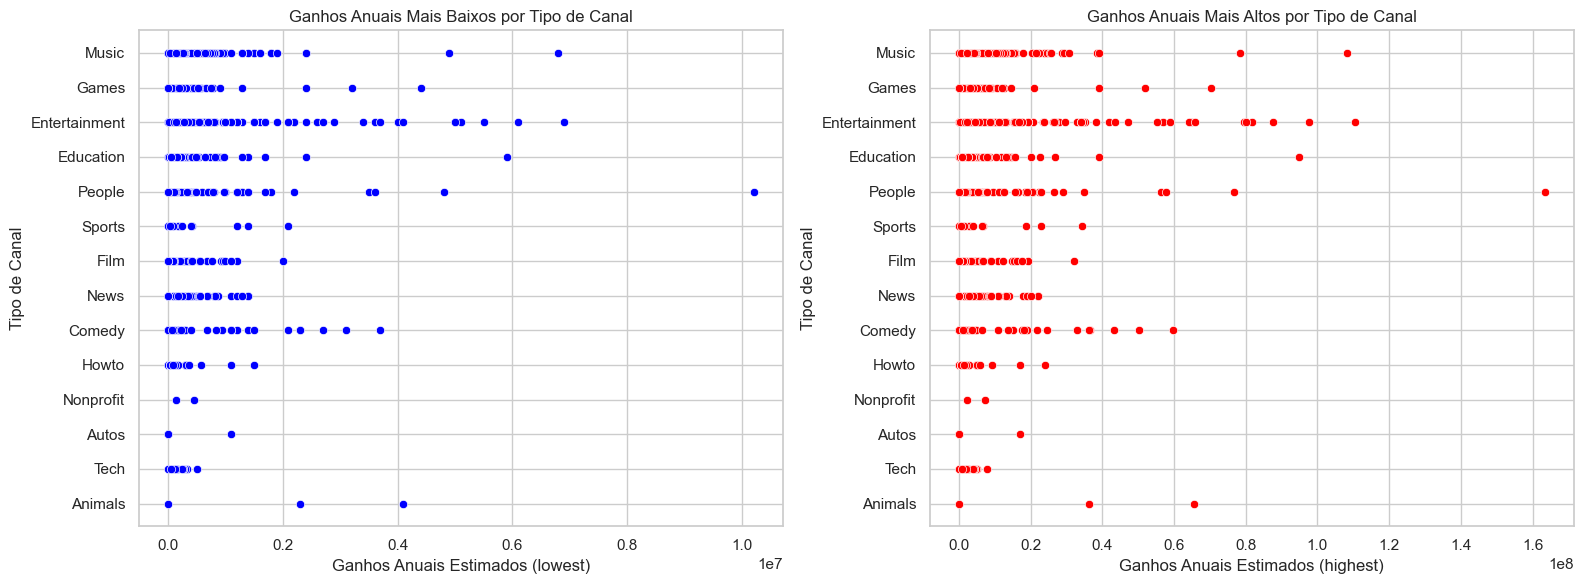

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(ax=axes[0], x='lowest_yearly_earnings', y='channel_type', data=df, color='blue')
axes[0].set_xlabel('Ganhos Anuais Estimados (lowest)')
axes[0].set_ylabel('Tipo de Canal')
axes[0].set_title('Ganhos Anuais Mais Baixos por Tipo de Canal')

sns.scatterplot(ax=axes[1], x='highest_yearly_earnings', y='channel_type', data=df, color='red')
axes[1].set_xlabel('Ganhos Anuais Estimados (highest)')
axes[1].set_ylabel('Tipo de Canal')
axes[1].set_title('Ganhos Anuais Mais Altos por Tipo de Canal')

plt.tight_layout()

Agora falando de valores, os canais que mais faturam com isso são do ramo de: Música, Entretenimento e Pessoas.

Os gráficos acima mostram os valores estimados do menor e maior ganhos anuais, respectivamente.

Mas qual país mais lucra com tudo isso?? Veremos abaixo.

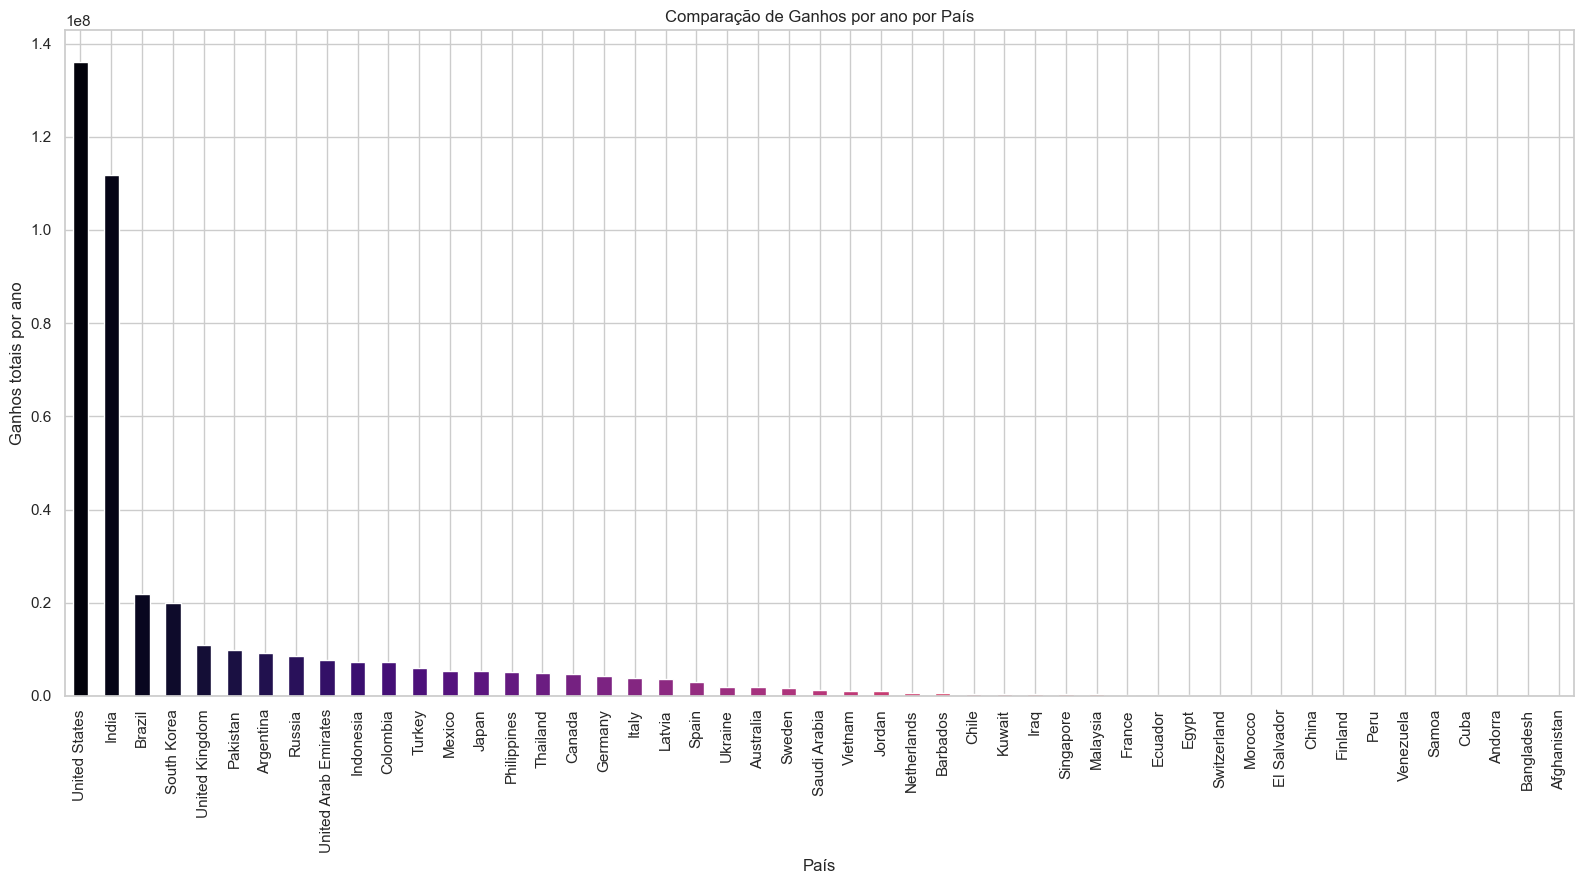

In [95]:
earning_por_pais = df.groupby('Country')['lowest_yearly_earnings'].sum()

earning_por_pais = earning_por_pais.sort_values(ascending=False)

sns.set(style="whitegrid")
colors = sns.color_palette("magma", len(uploads_por_pais))

plt.figure(figsize=(16, 9))
earning_por_pais.plot(kind='bar', color=colors)
plt.title('Comparação de Ganhos por ano por País')
plt.xlabel('País')
plt.ylabel('Ganhos totais por ano')
plt.xticks(rotation=90)
plt.tight_layout()

E o rank de maiores ganhos é:
- Top 1: Estados Unidos
- Top 2: Índia
- Top 3: Brasil

<Axes: xlabel='uploads', ylabel='video views'>

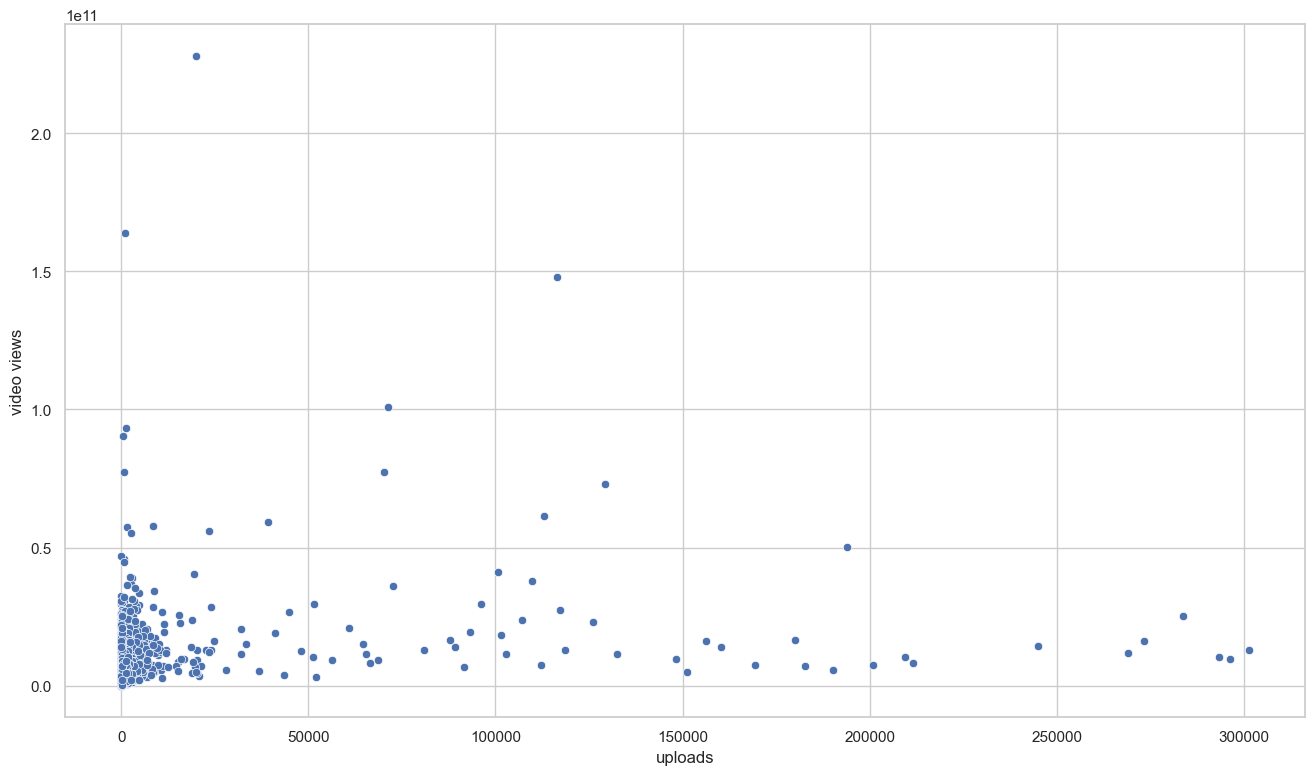

In [77]:
plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")
sns.scatterplot(y='video views', x='uploads', data=df)

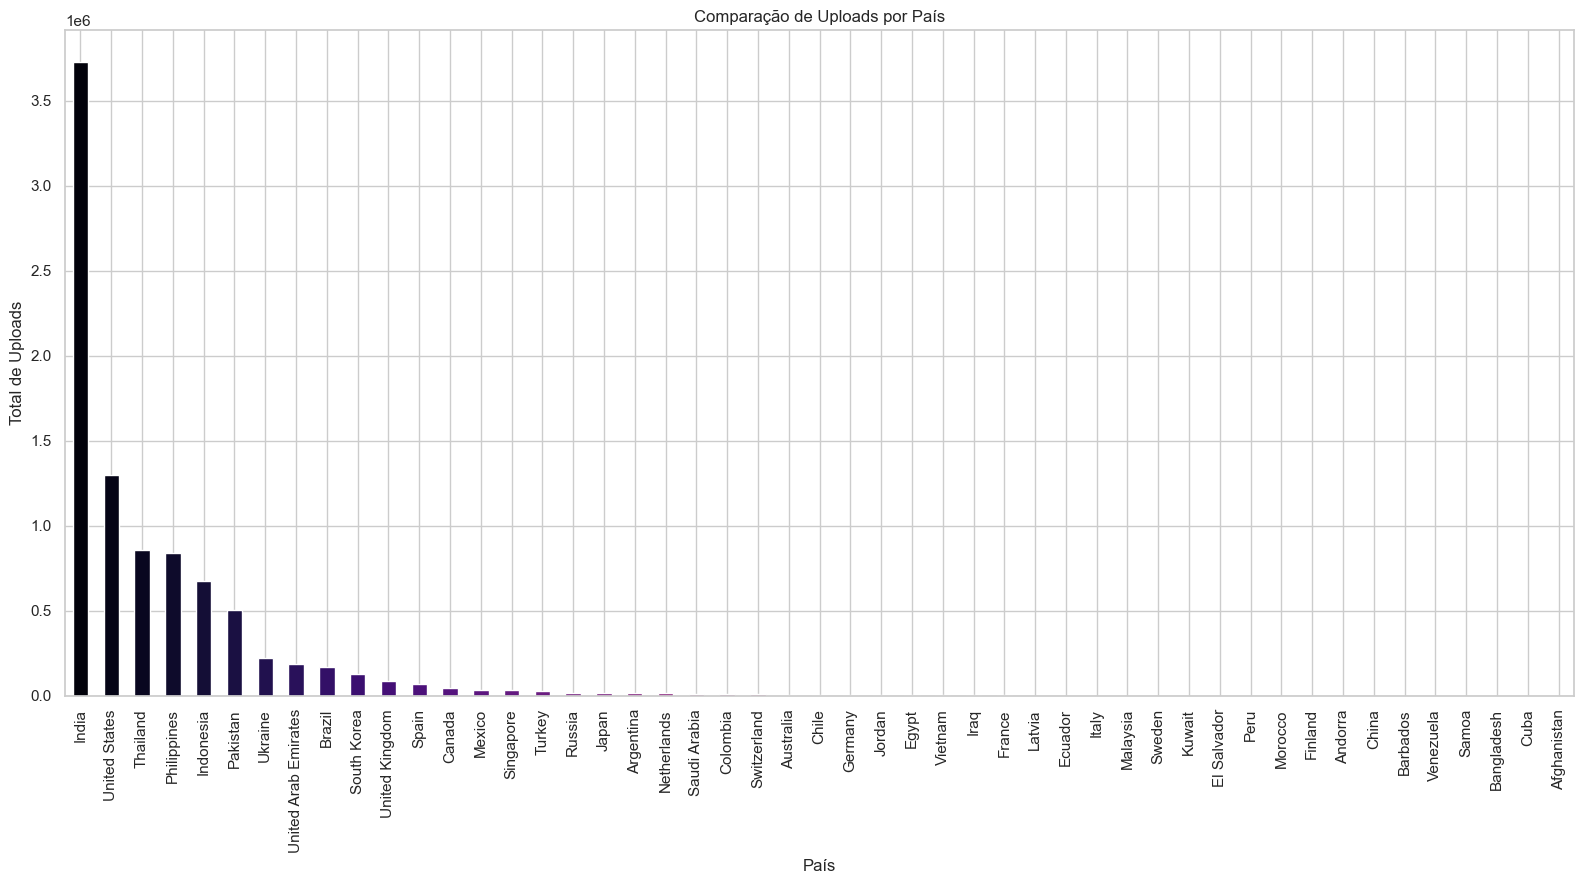

In [96]:
uploads_por_pais = df.groupby('Country')['uploads'].sum()

uploads_por_pais = uploads_por_pais.sort_values(ascending=False)

sns.set(style="whitegrid")
colors = sns.color_palette("magma", len(uploads_por_pais))

plt.figure(figsize=(16, 9))
uploads_por_pais.plot(kind='bar', color=colors)
plt.title('Comparação de Uploads por País')
plt.xlabel('País')
plt.ylabel('Total de Uploads')
plt.xticks(rotation=90)
plt.tight_layout()

Acima está uma análise para vermos qual país tem mais uploads de vídeos feitos. Nem precisamos dizer que a Índia também vem liderando isso, certo?

### CONCLUSÃO FINAL 

- A Índia é o país que mais tem feito upload de vídeos no youtube;
- Os Estados Unidos segue na liderança de maior lucro obtido com o youtube (estimado), logo atrás vem a Índia;
- O total de views comparado com o total de upload é, na maioria dos casos, desproporcional;
- Os melhores ramos a se seguir em relação a quantidade views e ganhos são: Música, Entretenimento e Vlogs/ Vídeos pessoais;
- O país que mais tem sucesso de canais no mundo é os Estados Unidos, seguido pela Índia e pelo Brasil;
- O canal com mais inscritos do mundo é o 'T-Series';
- Nem todo canal de um certo país de origem tem seu público alvo o próprio pessoal do país.